<a href="https://colab.research.google.com/github/LishaRudani/Housing_price-Prediction/blob/main/Housing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip

unzip:  cannot find or open /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip, /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip.zip or /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip.ZIP.


In [ ]:
df = pd.read_excel(r'/content/drive/MyDrive/Housing_dataset/DS_ Assignment_Part_1_dataset.xlsx')

In [ ]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [ ]:
# checking the number of rows and Columns in the data frame
df.shape

(414, 9)

In [ ]:
# check for missing values
df.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [ ]:
# statistical measures of the dataset
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [ ]:
correlation = df.corr()

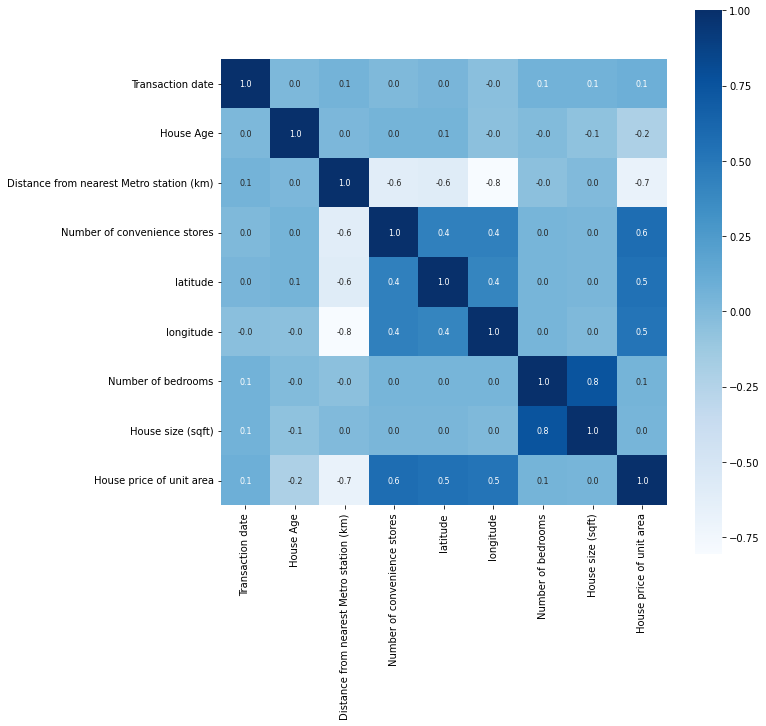

In [ ]:
# constructing a heatmap to nderstand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
X = df.drop(['House price of unit area'], axis=1)
Y = df['House price of unit area']

In [ ]:
print(X)
print(Y)

     Transaction date  House Age  Distance from nearest Metro station (km)  \
0         2012.916667       32.0                                  84.87882   
1         2012.916667       19.5                                 306.59470   
2         2013.583333       13.3                                 561.98450   
3         2013.500000       13.3                                 561.98450   
4         2012.833333        5.0                                 390.56840   
..                ...        ...                                       ...   
409       2013.000000       13.7                                4082.01500   
410       2012.666667        5.6                                  90.45606   
411       2013.250000       18.8                                 390.96960   
412       2013.000000        8.1                                 104.81010   
413       2013.500000        6.5                                  90.45606   

     Number of convenience stores  latitude  longitude  Number 

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(414, 8) (331, 8) (83, 8)


In [ ]:
# loading the model
model = XGBRegressor()

In [ ]:
# training the model with X_train
model.fit(X_train, Y_train)

[09:47:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [ ]:
print(training_data_prediction)

[39.869328 38.816597 37.742004 36.268024 39.24117  40.305405 18.967777
 53.501278 51.85209  32.41474  26.125751 29.254963 29.57093  47.769196
 70.638756 16.82785  42.70948  37.42644  66.64346  16.504509 17.20941
 42.752556 48.330013 55.07145  49.382984 28.639786 34.33176  45.83789
 36.950035 36.701057 37.687996 46.51569  37.736332 49.04509  60.089134
 45.20045  30.337149 48.842144 36.465286 38.11473  40.458847 22.23186
 40.297302 48.849895 16.646101 51.47897  41.076466 48.91992  40.964233
 16.492664 37.107338 26.034634 46.876904 31.569748 42.261375 57.435146
 37.44707  55.05494  24.828386 53.9971   59.34793  16.912151 50.122643
 31.19638  49.48783  35.86546  50.36588  27.505247 38.038387 27.572937
 16.334087 16.066967 27.766514 28.224506 16.214075 48.485928 57.134457
 47.585163 25.23119  42.736717 33.784023 50.82612  56.250916 58.139248
 53.792255 27.867805 29.31024  45.23382  50.66723  25.310099 50.11514
 42.32945  25.987267 37.625275 46.384743 49.90973  24.163115 23.989975
 39.77521 

In [ ]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9257465878599627
Mean Absolute Error :  2.784452100102635


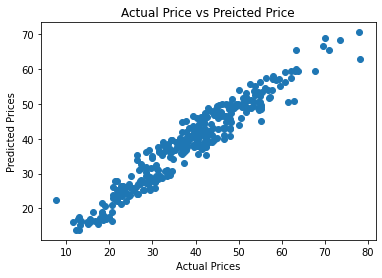

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

In [ ]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [ ]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.5807236298030187
Mean Absolute Error :  4.567190064579607
